<a href="https://colab.research.google.com/github/Ekaterina37/CS6375.502/blob/master/Assignment1_Grad_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import sklearn
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [26]:
#wine_dataset = load_wine()
#print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [50]:
#data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
#data.head()
#data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";") 
data = pd.read_csv("https://raw.githubusercontent.com/Ekaterina37/CS6375.502/master/winequality-red%20(1).csv")

In [51]:
#dropping a useless No column
#data = data.drop('No', 1)

for col in data.columns:
  print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [52]:
#print first 5 rows
print(data)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

In [ ]:
#assign x as a Dataframe of features and Y as series of outcomes

#X = data.drop('Y house price of unit area', 1) #feature matrix
#Y = data['Y house price of unit area'] #target variable
#newdata = data.values
#Y = newdata[:, -1].reshape(newdata.shape[0],1)
#X = newdata[:, :-1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#check features
#print(X)

In [54]:
#checking for nulls - all good
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

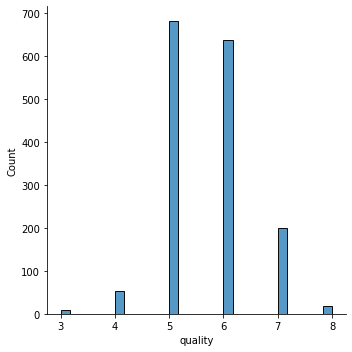

In [55]:
#plotting
sns.displot(data['quality'])

In [56]:
#making matrix for heatmap
matrix = data.corr()
print(matrix)

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

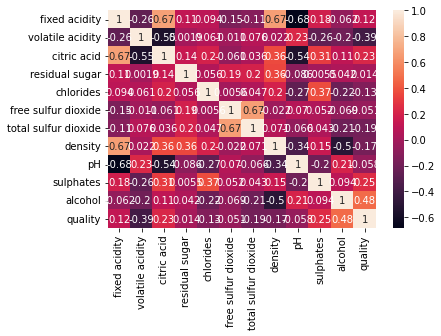

In [57]:
sns.heatmap(data = matrix, annot=True)

In [59]:
#standardization
s = StandardScaler()
data = pd.DataFrame(s.fit(data).fit_transform(data))

In [ ]:
#add column of 1's
#data.insert(0, "X1", 1)
#X.describe()

In [63]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=5)
train, test = train_test_split(data, test_size = 0.2, random_state=5)

In [64]:
print(train.shape)
print(test.shape)

(1279, 12)
(320, 12)


In [67]:
train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)
X = train_data[:, :-1]

In [68]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [71]:
#Checking shape 1279 wines with 12 features
print("Shape X_train :", X.shape)
print("Shape Y_train :", Y.shape)
print("Shape X_test :", X_test.shape)
print("Shape Y_test :", Y_test.shape)

Shape X_train : (1279, 12)
Shape Y_train : (1279, 1)
Shape X_test : (320, 12)
Shape Y_test : (320, 1)


In [69]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [73]:
#theta - vector, matrix size 70,1
def model(X,Y, learn_rate, iter):
   m = Y.size
   theta = np.zeros((X.shape[1],1))
   cost_list = []

   for i in range(iter):
     y_predict = np.dot(X, theta)

     cost = (1/(2*m))*np.sum(np.square(y_predict - Y))

     d_theta = (1/m)*np.dot(X.T, y_predict - Y)
     theta = theta - learn_rate*d_theta
     
     cost_list.append(cost)
     
     # let's print cost of the 5 first times
     if(i%(iter/5) == 0):
       print("Cost is :", cost)
       
   return theta, cost_list



In [81]:
iter = 1000
learn_rate = 0.005
theta, cost_list = model(X,Y,learn_rate, iter)

Cost is : 0.5005306606218549
Cost is : 0.33429927065214576
Cost is : 0.3262603599637403
Cost is : 0.32479870675814654
Cost is : 0.32421330884367155


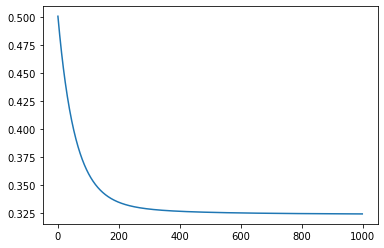

In [82]:
rng = np.arange(0, iter)
plt.plot(rng, cost_list)
plt.show()